<a href="https://colab.research.google.com/github/pramod-mamidi/DAs/blob/master/KNNclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
%matplotlib inline

In [3]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2020-05-07 12:33:38--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  36.18K  --.-KB/s    in 0.01s   

2020-05-07 12:33:38 (2.81 MB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



In [7]:
df=pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [8]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a1fd22390>]],
      dtype=object)

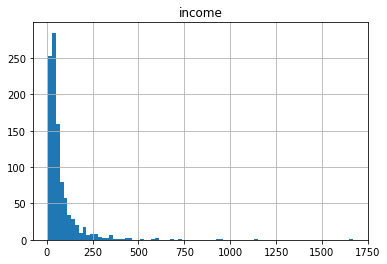

In [14]:
df.hist(column='income',bins=80)

           region    tenure       age  ...    gender    reside   custcat
region   1.000000  0.016388  0.015034  ...  0.050596 -0.065158 -0.023771
tenure   0.016388  1.000000  0.490217  ...  0.023533 -0.036592  0.166691
age      0.015034  0.490217  1.000000  ... -0.011419 -0.254993  0.056909
marital -0.080637  0.154171 -0.014433  ...  0.008345  0.625999  0.083836
address  0.010320  0.522952  0.660435  ...  0.008363 -0.201645  0.067913
income   0.023765  0.242912  0.327948  ...  0.038706 -0.097591  0.134525
ed      -0.057952 -0.109797 -0.154857  ...  0.006704  0.021045  0.193864
employ   0.016335  0.520288  0.670047  ...  0.046016 -0.134683  0.110011
retire   0.005595  0.171143  0.429440  ...  0.053906 -0.140120  0.008908
gender   0.050596  0.023533 -0.011419  ...  1.000000  0.016556 -0.004966
reside  -0.065158 -0.036592 -0.254993  ...  0.016556  1.000000  0.082022
custcat -0.023771  0.166691  0.056909  ... -0.004966  0.082022  1.000000

[12 rows x 12 columns]


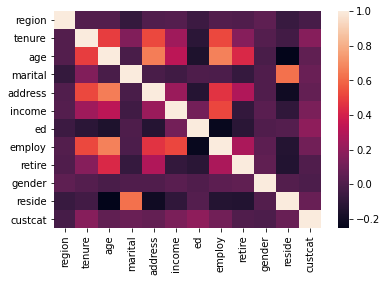

In [20]:
c=df.corr()
print(c)
sb.heatmap(c)

In [25]:
x=df[np.array(df.columns)[0:11:1]].values
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [34]:
y=df[['custcat']].values
y[0:5]

array([[1],
       [4],
       [3],
       [1],
       [3]])

In [35]:
sc=preprocessing.StandardScaler()
x=sc.fit(x).transform(x.astype(float))
x[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [0]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=4)

In [47]:
k=5
n=KNeighborsClassifier(n_neighbors=k).fit(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [51]:
prediction=n.predict(test_x)
y[0:5]

array([[1],
       [4],
       [3],
       [1],
       [3]])

In [56]:
print("test set accuracy is",metrics.accuracy_score(test_y,prediction))

test set accuracy is 0.315


In [59]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(train_x,train_y)
    pred=neigh.predict(test_x)
    mean_acc[n-1] = metrics.accuracy_score(test_y,pred)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was

The best accuracy was with 0.34 with k= 9


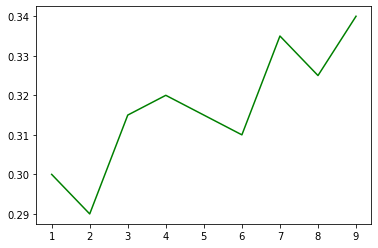

In [60]:
plt.plot(range(1,Ks),mean_acc,'g')
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)